In [13]:
import matplotlib
import numpy as np
import time
from scipy.fftpack import ifft, fft, fftfreq

# Análisis en Tiempo y Frecuencia
Este trabajo tiene como objetivo encontrar un método efectivo para realizar un análisis de frecuencia de Fourier en tiempo real, de manera que sea posible no solo conocer el contenido frecuencial de una onda, sino también los instantes de tiempo en los cuales cada frecuencia es relevante.

Para lograr esto, se crea primero una onda la cual consistirá en tres segmentos con frecuencias diferentes y conocidas, de manera que el análisis deberá proporcionar información de la frecuencia relevante en cada segmento. Para esto, se define la función **music2()**. Se define también la función **find_max()**, una función encargada de recibir 2 arreglos de igual dimensión (X y Y) como entradas y retornar el valor en X que corresponde a la misma posición donde se encuentra el máximo en Y, lo cual será útil para determinar la frecuencia más relevante una vez se obtiene el espectro de Fourier en magnitud. 

In [56]:
#Onda personalizada que tendrá las frecuencias 0.3 rad, 1 rad y 5 rad.
def music2(x):
    actual_sound = []
    for i in range (len(x)):
        if(x[i] <= 300):
            actual_sound.append(np.sin(0.3*x[i]))
        elif((x[i] > 300) and (x[i] <= 600)):
            actual_sound.append(np.sin(x[i]))
        elif(x[i] > 600):
            actual_sound.append(np.sin(5*x[i]))
    actual_sound=array(actual_sound)
    return actual_sound

#Finding the X value corresponding to the Y maximum value.
def find_max(X,Y):
    the_max = max(Y)
    long = len(X)
    position = 0
    for i in range (long):
        actual_Y = Y[i]
        if (actual_Y == the_max):
            position = i
    answer = X[position]
    return abs(answer)

Una vez definidas las funciones anteriores, se procede a obtener una primera visualización de la onda que será estudiada, para poder predecir lo que se espera encontrar. Como puede verse en la siguiente gráfica, las tres frecuencias son claramente distinguibles a lo largo de los valores en X sobre los cuales existe la onda.

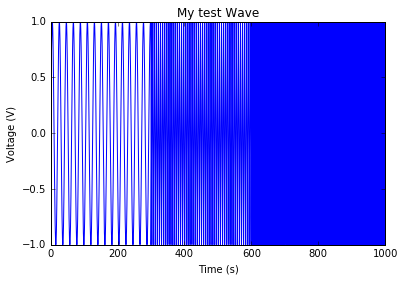

In [57]:
#Se imagina que la onda es un valor de voltaje, solamente por convención.
the_time = np.linspace(0,1000,10000)
answer2 = music2(the_time)
plot(the_time,answer2)
xlabel('Time (s)')
ylabel('Voltage (V)')
title('My test Wave')

Es necesario ahora comenzar a utilizar el método de multiplicar la onda estudiada por una campana gaussiana cuyo centro se desplaza a lo largo de los valores en X, de manera que se puede considerar que se obtiene la onda en un instante de tiempo específico para su estudio. Para crear estas campanas, se toma una media de 0, el centro inicial, y un sigma de 5. Este último parámetro se escoge aleatoriamente, y más adelante se estudiarán los efectos de variarlo en el análisis. Se construyen 3 campanas centradas en los valores de *200*, *500* y *800*, los cuales corresponden a secciones doonde solo existe una única frecuencia para la onda. Más adelante se estudiará lo que ocurre cuando la campana se situa de tal forma que contenga dos secciones de frecuenca distinta. El resultado de multiplicar la onda por cada una de las campanas creadas se puede observar a continuación, resultando en tres pulsos donde la frecuencia inicial aún está presente.

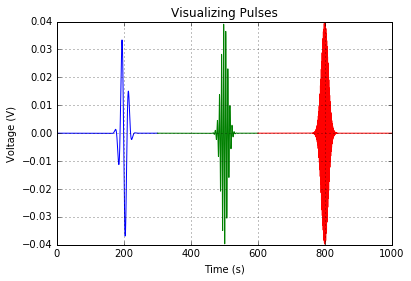

In [93]:
mean = 0
variance = 100
sigma = sqrt(variance)
X = linspace(0,1000,10000)
gauss1 = normpdf(X-200,mean,sigma)
gauss2 = normpdf(X-500,mean,sigma)
gauss3 = normpdf(X-800,mean,sigma)
pulse1 = gauss1*answer2
pulse2 = gauss2*answer2
pulse3 = gauss3*answer2
plot(the_time[0:3000],pulse1[0:3000])
plot(the_time[3000:6000],pulse2[3000:6000])
plot(the_time[6000:-1],pulse3[6000:-1])
xlim(0,1000)
xlabel('Time (s)')
ylabel('Voltage (V)')
grid(True)
title('Visualizing Pulses')

Una vez se tienen estos 3 pulsos, se procede a realizar el análisis de Fourier a cada uno, haciendo uso de la transformada discreta rápida de Fourier, obteniendo con la función **abs()** la magnitud del espectro. Esto se hace a continuación:

In [76]:
#Fourier Analysis
#For Pulse 1
N = len(the_time)
dt = (max(the_time)-min(the_time))/N
fft1 = fft(pulse1)
freqs = fftfreq(N,dt)
fourier_mag = abs(fft1)

#For Pulse 2
fftB = fft(pulse2)
fourier_mag2 = abs(fftB)
main_freq2 = find_max(freqs,fourier_mag2)

#For Pulse 3
fftC = fft(pulse3)
fourier_mag3 = abs(fftC)
main_freq3 = find_max(freqs,fourier_mag3)

Utilizando la función **find_max()**, se determina entonces la frecuencia más relevante de cada pulso, para de este modo realizar una comparación con los valores de frecuencias inicialmente declarados con la función **music2()** al momento de generar la onda estudiada. Es posible también ver a continuación la gráfica del espectro en magnitud de Fourier.

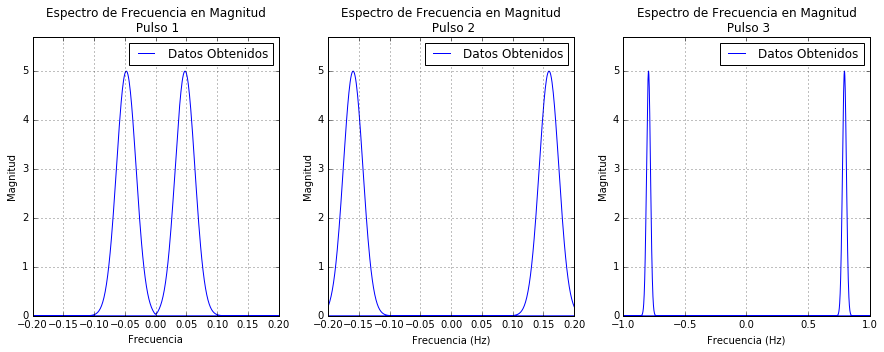

In [143]:
figure(figsize=(15,5))
subplot2grid((1,3),(0,0),colspan=1,rowspan=1)
plot(freqs,fourier_mag,label='Datos Obtenidos')
legend(loc = 'best')
xlim(-0.2,0.2)
ylim(0,5.7)
grid(True)
xlabel('Frecuencia')
ylabel('Magnitud')
title('Espectro de Frecuencia en Magnitud\n Pulso 1')
subplot2grid((1,3),(0,1),colspan=1,rowspan=1)
plot(freqs,fourier_mag2,label='Datos Obtenidos')
xlim(-0.2,0.2)
legend(loc='best')
grid(True)
xlabel('Frecuencia (Hz)')
ylabel('Magnitud')
title('Espectro de Frecuencia en Magnitud\n Pulso 2')
ylim(0,5.7)
subplot2grid((1,3),(0,2),colspan=1,rowspan=1)
plot(freqs,fourier_mag3,label='Datos Obtenidos')
xlim(-1,1)
grid(True)
xlabel('Frecuencia (Hz)')
ylabel('Magnitud')
title('Espectro de Frecuencia en Magnitud\n Pulso 3')
ylim(0,5.7)
legend(loc='best')

La comparación de datos con las frecuencias iniciales se realiza determinando el error experimental existente y mostrándolo en la siguiente tabla.

In [79]:
#Checking expected values
main_freq = find_max(freqs,fourier_mag)
theory_freq = 0.3/(2*pi)
theory_freq2 = 1/(2*pi)
theory_freq3 = 5/(2*pi)
error = abs(100*((theory_freq-main_freq)/theory_freq))
error2 = abs(100*((theory_freq2 - main_freq2)/theory_freq2))
error3 = abs(100*((theory_freq3 - main_freq3)/theory_freq3))
from prettytable import PrettyTable

In [87]:
x = PrettyTable(["Pulse", "Real Frequency (Hz)", 'Theoretical Frequency (Hz)','Error %'])
x.align["Pulse"] = "c" 
x.padding_width = 1 
x.add_row([1,main_freq, theory_freq, error])
x.add_row([2,main_freq2, theory_freq2, error2])
x.add_row([3,main_freq3, theory_freq3, error3])
print(x)

+-------+---------------------+----------------------------+-----------------+
| Pulse | Real Frequency (Hz) | Theoretical Frequency (Hz) |     Error %     |
+-------+---------------------+----------------------------+-----------------+
|   1   |        0.048        |     0.0477464829275686     |  0.530964914873 |
|   2   |        0.159        |    0.15915494309189535     | 0.0973536158446 |
|   3   |        0.796        |     0.7957747154594768     |  0.028310090299 |
+-------+---------------------+----------------------------+-----------------+


Se ha visto la efectividad del método de campanas Gaussianas para el análisis de Fourier en distintos intervalos de tiempo. Sin embargo, aún hay dos asuntos por resolver.
* Primero, hay que ver qué ocurre en las fronteras donde la campana puede contener dos frecuencias distintas.
* Segundo, hay que ver como se relacionan los parámetros de la campana gaussiana con los resultados obtenidos del análisis de Fourier.

## Condiciones de Frontera
Aquí se analiza qué ocurre cuando la campana de Gauss se utiliza en una región de la onda donde ocurre cambio de frecuencia. Para esto, se cenyra una campana gaussiana en el valor de 300, donde se sabe ocurre el cambio de frecuencia, y se realiza el análisis de Fourier en magnitud al pulso resultante.

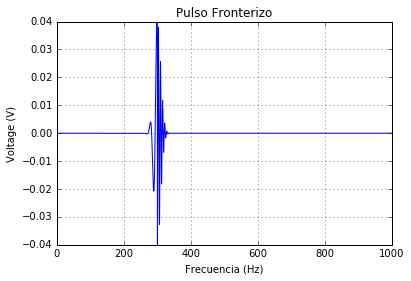

In [98]:
gauss_frontier = normpdf(X-300,mean,sigma)
pulse_frontier = gauss_frontier*answer2
plot(the_time,pulse_frontier)
grid(True)
xlabel('Frecuencia (Hz)')
ylabel('Voltage (V)')
title('Pulso Fronterizo')

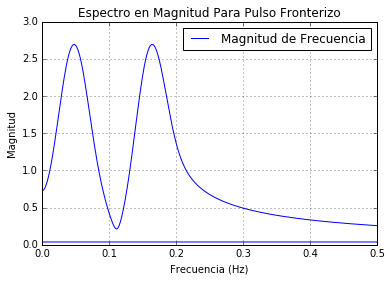

In [105]:
#El análisis de Fourier correspondiente a este pulso tan especial.
fft_frontier = abs(fft(pulse_frontier))
plot(freqs,fft_frontier,label='Magnitud de Frecuencia')
xlim(0,0.5)
grid(True)
xlabel('Frecuencia (Hz)')
ylabel('Magnitud')
title('Espectro en Magnitud Para Pulso Fronterizo')
legend(loc='best')

Aquí se presenta una complicación con el método de las campanas gaussianas. Según el espectro en magnitud obtenido, en el pequeño lapse de tiempo analizado de la frontera, existen las dos frecuencias simultánemente. Se sabe por la señal originalmente creada que una frecuencia desaparace y la otra inicia sin superposiciones, por lo que el análisis de un pulso fronterizo llevará a un error. La gráfica anterior muestra la presencia de ambas frecuencias tanto del primer segmento de onda como del segundo, cuando lo que idealmente se busca es una distinción. Por ahora, el método deberá utilizarse en todas secciones de la onda excepto en fronteras de fin y comienzo de frecuencias.

## Variación de Prámetros de la Campana Utilizada

Ahora, se procede a ver como la variación de parámetros de la campana puede afectar la efectividad de este método. Es posible variar dos caracteíritcas importantes de la campan. Su **ancho** y el valor en el cual está **centrada**. Debido a que la campana se desplaza para analizar cada segmento de la onda estudiada, cambiar su centro no tendrá efecto alguno. Por este motivo, se analiza únicamente entonces los efectos de variar su ancho.